<a href="https://colab.research.google.com/github/alsrn36533/pdm02/blob/main/notebook/chap03_ml_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chap03
- ML introduction

# iris: knn

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

print(iris)
iris.data.shape  
iris.target.shape #150개의 항목
print(iris.target_names) #각 이름

from sklearn.model_selection import train_test_split

X = iris.data  
y = iris.target

# (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
#

print(X_train.shape)
print(X_test.shape)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)  #가까운이웃 6개가져오기
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

#######################
#  Test on new data
#######################
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 전혀 보지 못한 새로운 데이터를 제시해보자. 
x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new) #새로운데이터 예측시키기

print(classes[y_predict[0]])
print(classes[y_predict[1]])


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# mnist:digits
- knn

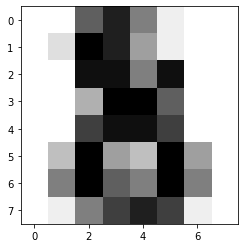

0.9805555555555555
[2]


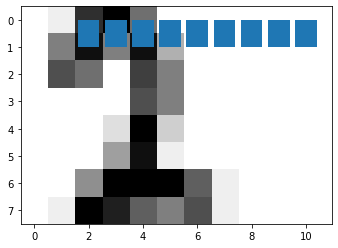

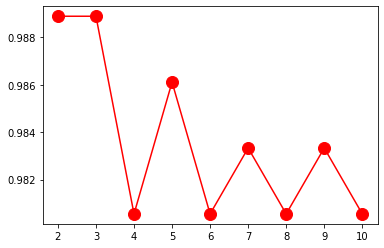

In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits() #저해상도에서 디지트라는 객체에 담는다.
str(digits)
digits.data.shape
digits.images.shape
digits.target.shape

plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest') #쥬변색에 마추는것
plt.show()
digits.images.shape

n_samples = len(digits.images) 
digits.images.shape
# Flattening (평탄화) : (8, 8) => (64,)
data = digits.images.reshape((n_samples, -1)) #엔샘플은나두고 나머지는 일자로 쭉 나열
data.shape

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2,random_state=4)

knn.fit(X_train, y_train) #fit는 훈련시키는 데이터

y_pred = knn.predict(X_test) #테스트데이터로 예측

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)

#####################################################
# DIY : Search the best hyperparameter: n_neighbors
#####################################################
scores = []
for kn in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=kn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)

scores

# Plot scores w.r.t. n_neighbors
plt.bar(range(2,11), scores)
# plt.ylim((0.95,1))
plt.show()

plt.plot(range(2,11), scores,'ro-', ms=12)
# plt.ylim((0.95,1))
plt.show()

# 혼동행렬
- mnist dataset
- knn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


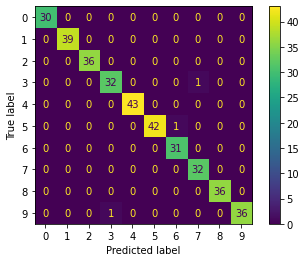

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        36
           3       0.97      0.97      0.97        33
           4       1.00      1.00      1.00        43
           5       1.00      0.98      0.99        43
           6       0.97      1.00      0.98        31
           7       0.97      1.00      0.98        32
           8       1.00      1.00      1.00        36
           9       1.00      0.97      0.99        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




In [3]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
# str(digits)
# digits.data.shape
# digits.images.shape
# digits.target.shape
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
plt.show()

print(f"{metrics.classification_report(y_test, y_pred)}\n")
